In [1]:
import albumentations as A

import cv2
import matplotlib.pyplot as plt

import os

In [2]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=130, p=0.5),
    A.Blur(blur_limit=301, p=0.2),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5),
    #A.RandomResizedCrop(480, 480),
    A.RGBShift(r_shift_limit=200, g_shift_limit=200, b_shift_limit=200, p=0.5),
    #A.RandomBrightness(limit=0.2, p=0.5),
    A.CLAHE(clip_limit=4.0, p=0.5),
], bbox_params=A.BboxParams(format='yolo')) #adjusted bounding box coordinates after augmentation

In [3]:
def load_images_from_folder(folder):
    images = []
    
    filenames = os.listdir(folder)
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    filenames = sorted(
        [f for f in filenames if f.lower().endswith(image_extensions)], 
        key=lambda x: int(os.path.splitext(x)[0])
    )
    for filename in filenames:
        # Construct the full path to the image file
        img_path = os.path.join(folder, filename)
        # Check if the file is an image
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

In [4]:
images_folder_path = 'C:\\Users\\georg\\Desktop\\sess1\\data\\images'
images = load_images_from_folder(images_folder_path)

In [5]:
def load_texts_from_folder(folder):
    texts = []
    
    filenames = os.listdir(folder)
    # Filter out non-text files and sort numerically
    filenames = sorted([f for f in filenames if f.lower().endswith('.txt')], key=lambda x: int(x.split('.')[0]))
    for filename in filenames:
        # Construct the full path to the text file
        file_path = os.path.join(folder, filename)
        # Check if the file is a text file
        if file_path.lower().endswith('.txt'):
            # Open and read the text file
            with open(file_path, 'r') as file:
                lines = file.readlines()
                texts.append(lines)
    return texts

In [6]:
labels_folder_path = 'C:\\Users\\georg\\Desktop\\sess1\\data\\labels'
labels = load_texts_from_folder(labels_folder_path)

In [7]:
len(images)

100

In [8]:
len(labels)

100

In [9]:
bboxes = []

In [10]:
transformed_images= []
transformed_bboxes= []

## Augmentation pipeline

In [11]:
for img, text in zip(images, labels):
    one_image=[]
    for line in text:
        # Split the line by whitespace to get class and coordinates
        data = line.strip().split()
        # Extract the coordinates and convert them to floats
        # class x_center y_center width height
        bbox = [float(coord) for coord in data[1:]]
        bbox.append(data[0])
        
        one_image.append(bbox)
        # Append the bounding box to the list of bounding boxes
    bboxes.append(one_image)
    
    transformed = transform(image=img, bboxes=one_image)
    transformed_images.append(transformed['image'])
    transformed_bboxes.append(transformed['bboxes'])

In [13]:
def yolo_to_opencv(img,bboxes):
    for bbox in bboxes:
        x_center, y_center, width, height, _ = bbox
        img_height, img_width = img.shape[:2]
        xmin = int((x_center - width / 2) * img_width)
        ymin = int((y_center - height / 2) * img_height)
        xmax = int((x_center + width / 2) * img_width)
        ymax = int((y_center + height / 2) * img_height)

        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 255, 0), 1)

In [14]:
bboxes[5]

[[0.46900000000000003, 0.5026666666666666, 0.19, 0.2853333333333333, '15'],
 [0.523, 0.7786666666666666, 0.43, 0.44266666666666665, '10'],
 [0.621, 0.776, 0.222, 0.448, '8'],
 [0.387, 0.7813333333333333, 0.222, 0.4373333333333333, '8']]

In [15]:
test_img=images[5]
test_bb=bboxes[5]

yolo_to_opencv(test_img,test_bb)

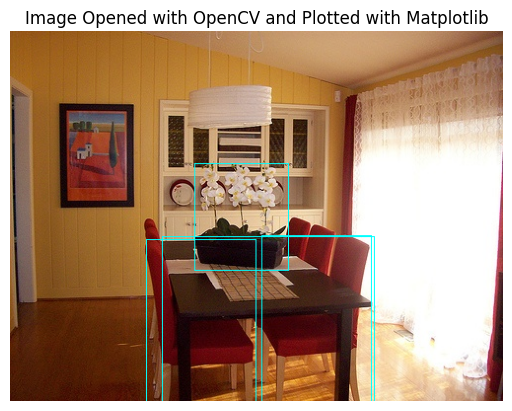

In [16]:
image_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Plot the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.title('Image Opened with OpenCV and Plotted with Matplotlib')
plt.show()

In [17]:
test_img_tr=transformed_images[5]
test_bb_tr=transformed_bboxes[5]

yolo_to_opencv(test_img_tr,test_bb_tr)

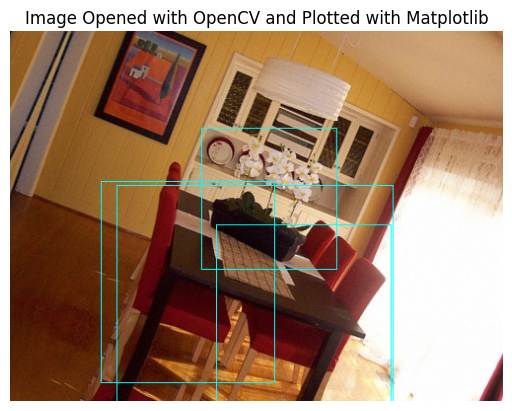

In [19]:
image_rgb_tr = cv2.cvtColor(test_img_tr, cv2.COLOR_BGR2RGB)

# Plot the image using Matplotlib
plt.imshow(image_rgb_tr)
plt.axis('off')  # Hide the axis
plt.title('Image Opened with OpenCV and Plotted with Matplotlib')
plt.show()

#### Later can save the transformed images with there labels will be easy work to do since saved in the correct order in arrays